In [1]:
import pandas as pd
import numpy as np


__Regression Models with Keras__

__Concrete Data__

In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Checking for Null values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
# Separate the data between variable and target
df_Y = df['Strength']
df_X = df.drop(columns='Strength')

## A. Build a baseline model (5 marks) 

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.
2. Train the model on the training data using 50 epochs.
3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.
5. Report the mean and the standard deviation of the mean squared errors.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

In [51]:
# regression model
def regression_model_3_hidden_layers(n_samples):
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(10, activation='relu', input_shape=(n_samples,)))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Simple regression model
def regression_model(n_samples):
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(10, activation='relu', input_shape=(n_samples,)))
    model.add(keras.layers.Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


def regression_run(X_, Y_, model_func,  ntime, epochs):
    MSE = []
    
    for n in range(ntime):
        # Randomly split the data into a training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.30, random_state=42)

        # Create the Model
        model = model_func(X_train.shape[1])

        # Fit the model
        model.fit(X_train, y_train, epochs=epochs, verbose=0)

        # Predict and MSE
        yhat = model.predict(X_test)
        MSE.append(mean_squared_error(y_test, yhat))
    return np.array(MSE)
 

In [59]:
# Run Once
MSE = regression_run(df_X, df_Y, regression_model, 1, 50)
print('Single Run: Mean squared error {}'.format(MSE[0]))

Single Run: Mean squared error 191.9797004653698


In [60]:
# Run 50 times 
MSE_A = regression_run(df_X, df_Y,regression_model, 50, 50)

In [61]:
print('50 Runs: Mean squared error Mean:{}   Standard Deviation: {} '.format( MSE_A.mean(), MSE_A.std() ))

50 Runs: Mean squared error Mean:418.9167117864352   Standard Deviation: 429.63884204916457 


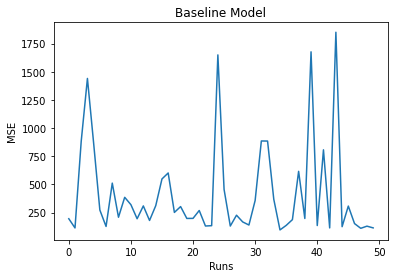

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Baseline Model')
ax.plot(np.arange(50), MSE_A)
plt.xlabel('Runs')
plt.ylabel('MSE');

## B. Normalize the data (5 marks) 

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [63]:
## Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Xsc = scaler.fit_transform(df_X)

In [65]:
# Run Once
MSE = regression_run(df_Xsc, df_Y, regression_model,1, 50)
print('Single Run: Mean squared error {}'.format(MSE[0]))

Single Run: Mean squared error 273.0736573287649


In [66]:
# Run 50 times 
MSE_B = regression_run(df_Xsc, df_Y, regression_model,50, 50)

In [67]:
print('50 Runs: Mean squared error Mean:{}   Standard Deviation: {} '.format( MSE_B.mean(), MSE_B.std() ))

50 Runs: Mean squared error Mean:357.63661121124346   Standard Deviation: 86.81682895693979 


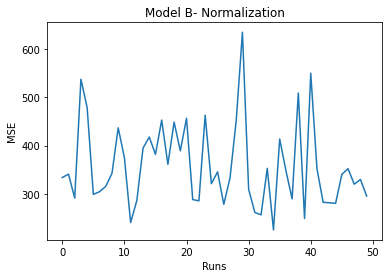

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Model B- Normalization')
ax.plot(np.arange(50), MSE_B)
plt.xlabel('Runs')
plt.ylabel('MSE');

__How does the mean of the mean squared errors compare to that from Step A?__
- The means are similars
- The Standard Deviation is smaller after normalization (factor of 5), 
    which mean less fluctuation between random spilt of the data

In [72]:
print( 'Mean Squared Error Ratio {} \nStandard Deviation Ratio {}'.format( MSE_B.mean()/MSE_A.mean(), MSE_B.std()/MSE_A.std()))

Mean Squared Error Ratio 0.8537176988860915 
Standard Deviation Ratio 0.20206932069471767


## C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

In [73]:
# Run Once
MSE = regression_run(df_Xsc, df_Y, regression_model, 1, 100)
print('Single Run: Mean squared error {}'.format(MSE[0]))

Single Run: Mean squared error 140.57819366673556


In [74]:
# Run 50 times 
MSE_C = regression_run(df_Xsc, df_Y,regression_model,50, 100)

In [75]:
print('50 Runs: Mean squared error Mean:{}   Standard Deviation: {} '.format( MSE_C.mean(), MSE_C.std() ))

50 Runs: Mean squared error Mean:161.2480063811113   Standard Deviation: 26.47317880080501 


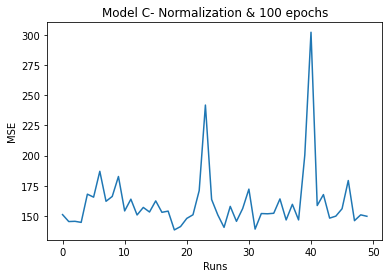

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Model C- Normalization & 100 epochs')
ax.plot(np.arange(50), MSE_C)
plt.xlabel('Runs')
plt.ylabel('MSE');

__How does the mean of the mean squared errors compare to that from Step B?__
- The means decreased after 100 epochs ( factor of 2)
- The Standard Deviation also decreased after 100 epochs ( factor of 3)

In [78]:
print( 'Mean Squared Error Ratio {} \nStandard Deviation Ratio {}'.format( MSE_C.mean()/MSE_B.mean(), MSE_C.std()/MSE_B.std()))

Mean Squared Error Ratio 0.4508710834581411 
Standard Deviation Ratio 0.304931418468825


## D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

In [79]:
# Run Once
MSE = regression_run(df_Xsc, df_Y, regression_model_3_hidden_layers, 1, 50)
print('Single Run: Mean squared error {}'.format(MSE[0]))

Single Run: Mean squared error 137.65096537923816


In [80]:
# Run 50 times 
MSE_D = regression_run(df_Xsc, df_Y,regression_model_3_hidden_layers,50, 50)

In [81]:
print('50 Runs: Mean squared error Mean:{}   Standard Deviation: {} '.format( MSE_D.mean(), MSE_D.std() ))

50 Runs: Mean squared error Mean:125.80020531765467   Standard Deviation: 11.95681675659998 


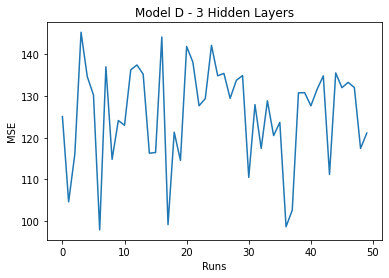

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Model D - 3 Hidden Layers')
ax.plot(np.arange(50), MSE_D)
plt.xlabel('Runs')
plt.ylabel('MSE');

### How does the mean of the mean squared errors compare to that from Step B?
- The means did decreased after 50 epochs ( factor of 3)
- The Standard Deviation also decreased after 50 epochs (factor of 7)

In [84]:
print( 'Mean Squared Error Ratio {} \nStandard Deviation Ratio {}'.format( MSE_D.mean()/MSE_B.mean(), MSE_D.std()/MSE_B.std()))

Mean Squared Error Ratio 0.35175427060332165 
Standard Deviation Ratio 0.13772464279397298


## Summary

In [87]:
df_mse = pd.DataFrame( 
              {'Value':['mean','std'],
               'Model A':[ MSE_A.mean(), MSE_A.std() ],
               'Model B':[ MSE_B.mean(), MSE_B.std() ],
               'Model C':[ MSE_C.mean(), MSE_C.std() ],
               'Model D':[ MSE_D.mean(), MSE_D.std() ] })
df_mse = df_mse.set_index('Value')

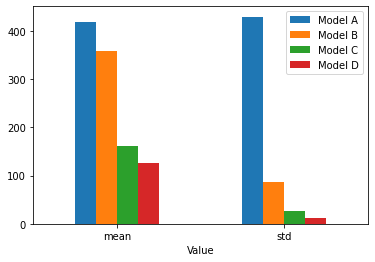

In [88]:
ax = df_mse.plot.bar(rot=0)